In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random
import math
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop, Adadelta, Adam, Adamax, Nadam

In [2]:
def Amplitude(omega, zeta): 
    A = 1/math.sqrt((1-omega**2)**2+(2*zeta*omega)**2)
    return A

In [66]:
zeta_0 = 0.1   # Damping ratio
w_min = 0.0    # Start frequency
w_max = 10.0   # End frequency
N_omega = 20  # Number of points per interval  

In [67]:
w = np.linspace(w_min, w_max, N_omega).reshape(-1, 1)
Amplitude = np.vectorize(Amplitude)
a = Amplitude(w, zeta_0)

In [65]:
len(a)

300

In [68]:
x_train, x_test, y_train, y_test = train_test_split(w, a, test_size=0.2, random_state=42)

In [69]:
# Create a model
def baseline_model():
    height = 100
    model = Sequential()    
    model.add(Dense(height, input_dim=1, activation='tanh', kernel_initializer='uniform'))
    model.add(Dense(height, input_dim=height, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(height, input_dim=height, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(1, input_dim=height, activation='linear', kernel_initializer='uniform'))
    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    adamax = Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
    nadam = Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
    rms = RMSprop(learning_rate=0.001, rho=0.9)
    model.compile(loss='mse', optimizer=rms)
    return model

In [70]:
# Training the model
model = baseline_model()
model.fit(x_train, y_train, epochs=1000, verbose = 0)

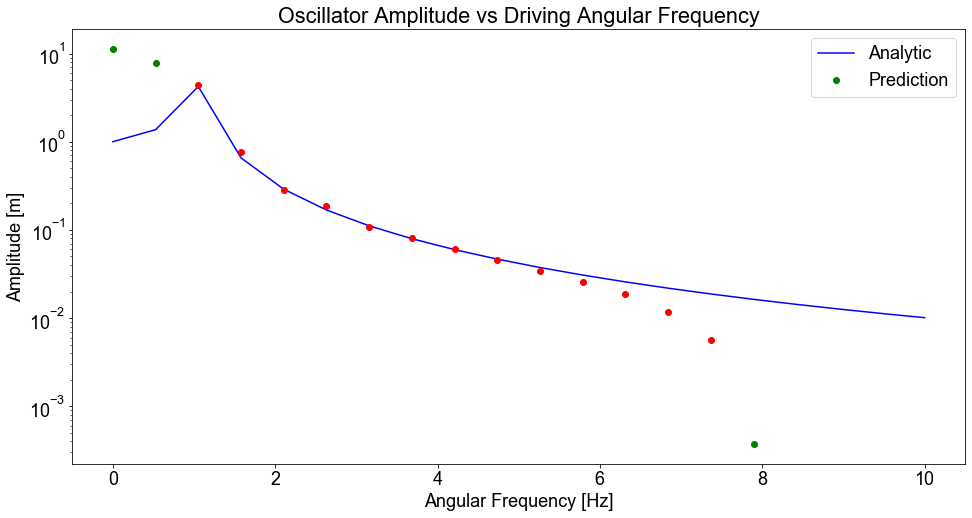

In [71]:
plt.figure(figsize=(16,8))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "18"

plt.title('Oscillator Amplitude vs Driving Angular Frequency')
plt.semilogy(w, a, 'b')
plt.semilogy(x_test, model.predict(x_test), 'og')
plt.semilogy(x_train, model.predict(x_train), 'or')

plt.xlabel('Angular Frequency [Hz]')
plt.ylabel('Amplitude [m]')

plt.legend(['Analytic', 'Prediction'])
plt.show()